In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import norm
%matplotlib inline
import pathlib as plb
import matplotlib.mlab as mlab
import skimage.io
import dabest

## Beginning of N2/DMSO bin analysis 

1. Subset of all control data from fall 2020 assay

In [7]:
### Reading and cleaning up the data
fall_data = pd.read_csv('/Volumes/LaCie/Controls/fall20_control_data.csv', header=None, 
                        usecols=[11,12,13,15,16,17,18,19], 
                        names=['Total Worms', 'Chemotaxis', 'Compound Name','Filename' ,'Slot', 
                               'Well', 'PID', 'Compound'])

fall_data.head()

,Total Worms,Chemotaxis,Compound Name,Filename,Slot,Well,PID,Compound
0,130,0.783333,EtOH (control),NPP_201030_01_fin.tif,1,C,NPP_201030_001C,EtOH
1,170,0.333333,H2O(controll),NPP_201030_01_fin.tif,2,C,NPP_201030_002C,H2O
2,120,-0.010101,DMSO,NPP_201106_02_fin.tif,2,B,NPP_201106_006B,DMSO
3,187,0.077844,EtOH (control),NPP_201106_02_fin.tif,4,D,NPP_201106_008D,EtOH
4,130,0.299145,H2O(controll),NPP_201106_03_fin.tif,1,C,NPP_201106_009C,H2O


2. Subset all DMSO data from fall 2020 data

In [6]:
DMSO = fall_data.loc[fall_data['Compound']=='DMSO']
DMSO

,Total Worms,Chemotaxis,Compound Name,Filename,Slot,Well,PID,Compound
2,120,-0.010101,DMSO,NPP_201106_02_fin.tif,2,B,NPP_201106_006B,DMSO
5,226,-0.415385,DMSO,NPP_201030_02_fin.tif,4,A,NPP_201030_008A,DMSO
8,171,-0.041096,DMSO,NPP_201106_04_fin.tif,1,A,NPP_201106_011A,DMSO
11,181,0.392857,DMSO,NPP_201030_04_fin.tif,1,C,NPP_201030_011C,DMSO
13,321,-0.010453,DMSO,NPP_201102_05_fin.tif,2,A,NPP_201102_016A,DMSO
15,189,-0.090909,DMSO,NPP_201102_01_fin.tif,2,B,NPP_201102_002B,DMSO


In [8]:
DMSO.to_csv('/Volumes/LaCie/Controls/fall20_DMSO_summary.csv')

## Next Steps

#### The following is a test case for Fall 2020 data

In [2]:
data1030 = pd.read_csv('/Users/emilyfryer/Documents/Current_analysis/automated_results/201030.csv')
data1102 = pd.read_csv('/Users/emilyfryer/Documents/Current_analysis/automated_results/201102.csv')
data1106 = pd.read_csv('/Users/emilyfryer/Documents/Current_analysis/automated_results/201106.csv')

In [3]:
fall_dat = pd.concat([data1030, data1102, data1106])
fall_dat.tail()

,Unnamed: 0,WellNo,centroid-0,centroid-1,bbox-0,bbox-1,bbox-2,bbox-3,area,Total Worms,Chemotaxis,Compound,Strain,Image ID,Slot,Well,pid,Solvent,Neighbor
75,91,1D,5834,7304,5389,5804,6280,8849,2315202,188,0.029240,p-Anisaldehyde,NaN,NPP_201106_06_fin.tif,1,D,NPP_201106_019,EtOH,1
76,92,2A,1461,2792,1019,1255,1907,4328,2365488,168,-0.219858,Bergamont,NaN,NPP_201106_06_fin.tif,2,A,NPP_201106_020,DMSO,1
77,93,2B,2911,2781,2459,1276,3357,4323,2366689,154,-0.248120,CITRULLINE,NaN,NPP_201106_06_fin.tif,2,B,NPP_201106_020,H2O,2
78,94,2C,4298,2836,3854,1317,4745,4362,2348682,174,-0.253333,"trans-Caffeic acid/3,4-Dihydroxycinnamic acid",NaN,NPP_201106_06_fin.tif,2,C,NPP_201106_020,EtOH,2
79,95,2D,5727,2825,5260,1278,6173,4353,2330610,150,-0.430894,trans-anethole,NaN,NPP_201106_06_fin.tif,2,D,NPP_201106_020,DMSO,1


In [4]:
cv = fall_dat.groupby(['Compound'])['Chemotaxis'].std() / fall_dat.groupby(['Compound'])['Chemotaxis'].mean()



In [5]:
mean_groups = fall_dat.groupby(['Compound'])['Chemotaxis'].mean()
var_groups = fall_dat.groupby(['Compound'])['Chemotaxis'].var()
std_groups = fall_dat.groupby(['Compound'])['Chemotaxis'].std()

In [7]:
sum_dat = pd.concat([mean_groups, std_groups, var_groups, cv], axis=1, )

In [8]:
sum_dat.columns = ['Mean', 'SD', 'Variance', 'CV']
sum_dat.head()

,Mean,SD,Variance,CV
Compound,,,,
(S)-(+)-Carvone,-0.155887,0.443514,0.196704,-2.845098
(S)-(-)-Carvone,-0.222555,0.212017,0.044951,-0.952652
(±)-Camphor,0.003254,0.156127,0.024376,47.985486
1-octanol,0.044225,0.421207,0.177415,9.524274
2-Methyl-1-butanol,0.661370,0.225475,0.050839,0.340921


In [15]:
sum_dat.to_csv('/Users/emilyfryer/Documents/Current_analysis/automated_results/CV_summary_data.csv')

Text(0.5, 0, 'Data')

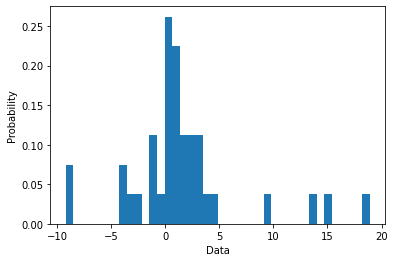

In [13]:
plt.hist(sum_dat['CV'], density=True, bins=40)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data')

In [12]:
for index, row in sum_dat.iterrows():
    if abs(row['CV']) >= 20:
        sum_dat.drop(index, inplace=True)

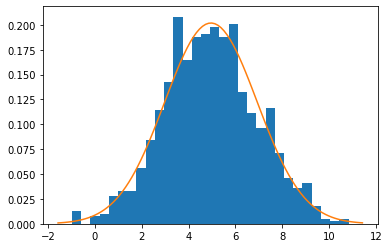

In [58]:
plt.hist(data, bins=30, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)
plt.show()

## Combining all N2/DMSO data 

In [12]:
locations_folder = plb.Path('/Volumes/LaCie/Controls/DMSO_N2_locations/')
results_files = locations_folder.glob('loc*.csv')

In [13]:
N2_DMSO = []
for file in results_files:
    this_experiment_df = pd.read_csv(file)
    N2_DMSO.append(this_experiment_df)

N2_DMSO
N2_DMSO = pd.concat(N2_DMSO, sort=True)

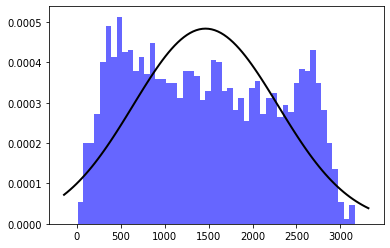

In [38]:
data = N2_DMSO['centroid-1']
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=50, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

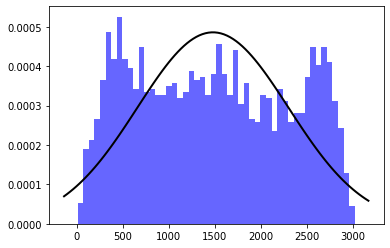

In [11]:
data = N2_DMSO['centroid-1']
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=50, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

### Looking at CV of DMSO for Fall 2020 and Spring 2021

In [15]:
combined = pd.read_csv('/Volumes/LaCie/Controls/combined_DMSO.csv')
cv = pd.DataFrame({'Coefficient of Variance' : combined.groupby(['Compound'])['Chemotaxis'].std() / combined.groupby(['Compound'])['Chemotaxis'].mean().abs()})

In [16]:
cv

,Coefficient of Variance
Compound,
DMSO,8.829606


In [17]:
combined

,Total Worms,Chemotaxis,Compound Name,Filename,Slot,Well,PID,Compound
0,120,-0.010101,DMSO,NPP_201106_02_fin.tif,2,B,NPP_201106_006B,DMSO
1,226,-0.415385,DMSO,NPP_201030_02_fin.tif,4,A,NPP_201030_008A,DMSO
2,171,-0.041096,DMSO,NPP_201106_04_fin.tif,1,A,NPP_201106_011A,DMSO
3,181,0.392857,DMSO,NPP_201030_04_fin.tif,1,C,NPP_201030_011C,DMSO
4,321,-0.010453,DMSO,NPP_201102_05_fin.tif,2,A,NPP_201102_016A,DMSO
5,189,-0.090909,DMSO,NPP_201102_01_fin.tif,2,B,NPP_201102_002B,DMSO
6,203,0.033708,DMSO,NPP_210319_POST_001,4,D,NPP_210319_004,NaN
7,267,0.154185,DMSO,NPP_210322_POST_006,2,D,NPP_210322_022,NaN
8,277,0.195312,DMSO,NPP_210325_POST_001,4,D,NPP_210325_004,NaN


In [23]:
    fin_file = plb.Path('/Volumes/LaCie/Bio301p/Images/NPP_210329_POST_004.tiff')
    fin_image = skimage.io.imread(fin_file)

In [26]:
fin_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [30]:
fin_image.shape

(14039, 10200)

## Creating an estimation plot of all DMSO values for practice

[3.24990697 3.12934531 2.33031129 2.38810626 3.08502476 2.99266769
 2.39047064 3.06663173 2.62424593 2.55488915 3.30198177 3.06949754
 3.31305555 3.34169969 3.46764155 3.01558777 3.0013813  3.16610502
 3.15838135 2.78986592]
